<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [2]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-15 13:54:32--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.6MB/s    in 2.6s    

2025-08-15 13:54:34 (58.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
# Set max_rows to None to display all rows
pd.set_option('display.max_rows', None)
# Set the option to display all columns
pd.set_option('display.max_columns', None)
# ===================================================================================================
# Functional automatization & Data Preprocessing

def get_summary_stats(df):
    """
    Returns summary statistics for each column in the DataFrame.
    """
    return pd.DataFrame({
        "Column name": df.columns,  # Column names
        "DataType": df.dtypes.values,  # Data types of columns
        "Number of rows": df.shape[0],  # Total number of rows
        "Number of columns": df.shape[1],  # Total number of columns
        "Not-Null Columns": df.notnull().sum().values,  # Count of non-missing values
        "Missing Count": df.isnull().sum().values,  # Count of missing values
        "Missing Percentage": (df.isnull().mean() * 100).values  # Percentage of missing values
    })

summary_stats = get_summary_stats(df)
display(summary_stats)

# ===================================================================================================

# ===================================================================================================
def split_and_explode(df, column, sep=';'):
    """
    Split a column by a separator and explode it into multiple rows.
    Also strips leading/trailing spaces from each element.

    df: input DataFrame
    column: name of the column to split & explode
    sep: separator to split the string (default: ';')
    """
    df_copy = df.copy()
    # Split the column
    df_copy[column] = df_copy[column].str.split(sep)
    # Explode into multiple rows
    df_copy = df_copy.explode(column)
    # Remove leading/trailing spaces
    df_copy[column] = df_copy[column].str.strip()
    
    return df_copy
# ===================================================================================================

# ===================================================================================================
# Age mapping
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# YearsCodePro mapping
years_mapping = {
    'Less than 1 year': 0.5,
    'More than 50 years': 51
}

def prepare_dataframe(df, columns, remove_outliers=False, iqr_column=None):
    """
    Prepares a DataFrame for plotting or analysis.
    
    Parameters:
        df (DataFrame): Original DataFrame.
        columns (list): List of columns to keep (drop rows with NaN in these columns).
        remove_outliers (bool): Whether to remove extreme values using IQR.
        iqr_column (str): Column used for IQR calculation.
    
    Returns:
        DataFrame: Cleaned DataFrame ready for analysis.
    """
    df_clean = df.copy()
    
    # Map Age values to numerical values
    if 'Age' in df_clean.columns:
        df_clean['Age_mapped'] = df_clean['Age'].map(age_mapping)
    
    # Replace text-based YearsCodePro values and convert to numeric
    if 'YearsCodePro' in df_clean.columns:
        df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace(years_mapping)
        df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')
    
    # Drop NaN values in the required columns
    df_clean = df_clean.dropna(subset=columns).copy()
    
    # Remove outliers if enabled
    if remove_outliers and iqr_column:
        Q1 = df_clean[iqr_column].quantile(0.25)
        Q3 = df_clean[iqr_column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[iqr_column] >= lower) & (df_clean[iqr_column] <= upper)].copy()
    
    return df_clean
# ===================================================================================================

,Column name,DataType,Number of rows,Number of columns,Not-Null Columns,Missing Count,Missing Percentage
0,ResponseId,int64,65437,114,65437,0,0.000000
1,MainBranch,object,65437,114,65437,0,0.000000
2,Age,object,65437,114,65437,0,0.000000
3,Employment,object,65437,114,65437,0,0.000000
4,RemoteWork,object,65437,114,54806,10631,16.246160
5,Check,object,65437,114,65437,0,0.000000
6,CodingActivities,object,65437,114,54466,10971,16.765744
7,EdLevel,object,65437,114,60784,4653,7.110656
8,LearnCode,object,65437,114,60488,4949,7.563000
9,LearnCodeOnline,object,65437,114,49237,16200,24.756636


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



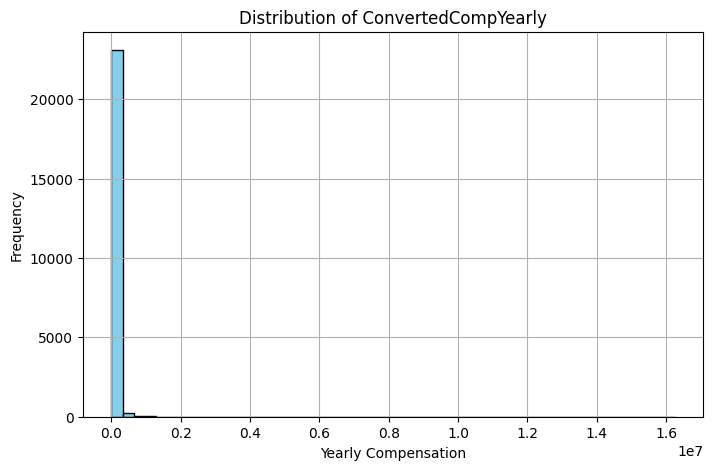

In [5]:
## Write your code here
## Write your code here
# Connect to a physical SQLite database file
import sqlite3
conn = sqlite3.connect("survey.db")
cursor = conn.cursor()

# Create the survey table in the database (replace if exists)
df.to_sql("survey", conn, index=False, if_exists="replace")

# Query only the ConvertedCompYearly column (filter out NULLs)
query = "SELECT ConvertedCompYearly FROM survey WHERE ConvertedCompYearly IS NOT NULL"
converted_comp = pd.read_sql_query(query, conn)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(converted_comp['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of ConvertedCompYearly')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



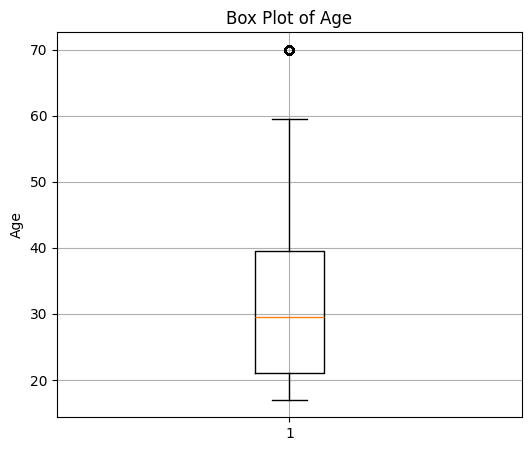

In [6]:
## Write your code here
# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Connect to SQLite database and create table
conn = sqlite3.connect("survey.db")
df.to_sql("survey", conn, index=False, if_exists="replace")

# Query AgeNumeric values, ignoring NULLs
query = "SELECT AgeNumeric FROM survey WHERE AgeNumeric IS NOT NULL"
age_data = pd.read_sql_query(query, conn)

# Plot box plot
plt.figure(figsize=(6,5))
plt.boxplot(age_data['AgeNumeric'], vert=True)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



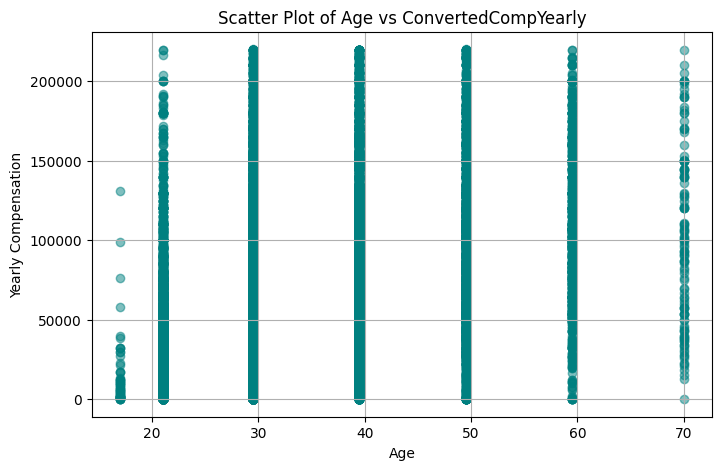

In [7]:
## Write your code here
# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Connect to SQLite database and create table
conn = sqlite3.connect("survey.db")
df.to_sql("survey", conn, index=False, if_exists="replace")

# Query AgeNumeric and ConvertedCompYearly, ignoring NULLs
query = """
SELECT AgeNumeric, ConvertedCompYearly
FROM survey
WHERE AgeNumeric IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
data = pd.read_sql_query(query, conn)

# Apply Interquartile Range (IQR) filtering to ConvertedCompYearly
Q1 = data['ConvertedCompYearly'].quantile(0.25)
Q3 = data['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Keep only data within 1.5*IQR
filtered_data = data[(data['ConvertedCompYearly'] >= Q1 - 1.5*IQR) & 
                     (data['ConvertedCompYearly'] <= Q3 + 1.5*IQR)]

# Scatter plot
plt.figure(figsize=(8,5))
plt.scatter(filtered_data['AgeNumeric'], filtered_data['ConvertedCompYearly'], alpha=0.5, color='teal')
plt.title('Scatter Plot of Age vs ConvertedCompYearly')
plt.xlabel('Age')
plt.ylabel('Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


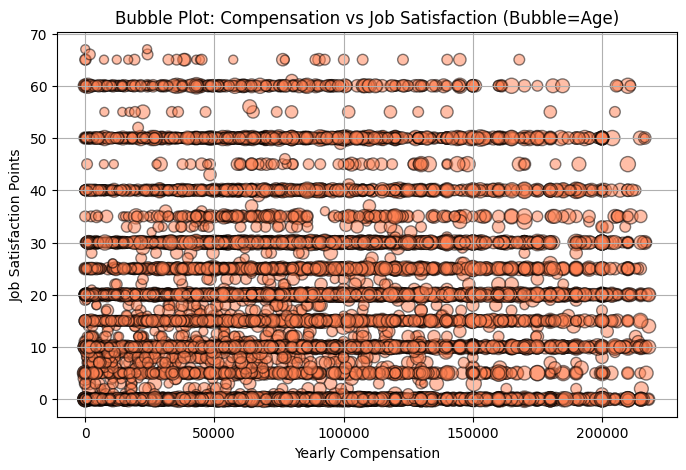

In [8]:
## Write your code here
# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Query relevant columns, ignoring NULLs
query = """
SELECT ConvertedCompYearly, JobSatPoints_6, AgeNumeric
FROM survey
WHERE ConvertedCompYearly IS NOT NULL 
AND JobSatPoints_6 IS NOT NULL 
AND AgeNumeric IS NOT NULL
"""
data = pd.read_sql_query(query, conn)

# Apply IQR filtering for ConvertedCompYearly
Q1_comp = data['ConvertedCompYearly'].quantile(0.25)
Q3_comp = data['ConvertedCompYearly'].quantile(0.75)
IQR_comp = Q3_comp - Q1_comp
filtered_data = data[(data['ConvertedCompYearly'] >= Q1_comp - 1.5*IQR_comp) & 
                     (data['ConvertedCompYearly'] <= Q3_comp + 1.5*IQR_comp)]

# Apply IQR filtering for JobSatPoints_6
Q1_job = filtered_data['JobSatPoints_6'].quantile(0.25)
Q3_job = filtered_data['JobSatPoints_6'].quantile(0.75)
IQR_job = Q3_job - Q1_job
filtered_data = filtered_data[(filtered_data['JobSatPoints_6'] >= Q1_job - 1.5*IQR_job) &
                              (filtered_data['JobSatPoints_6'] <= Q3_job + 1.5*IQR_job)]

# Bubble plot
plt.figure(figsize=(8,5))
plt.scatter(
    filtered_data['ConvertedCompYearly'], 
    filtered_data['JobSatPoints_6'], 
    s=filtered_data['AgeNumeric']*2,  # Bubble size proportional to age
    alpha=0.5, 
    color='coral',
    edgecolor='black'
)
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble=Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



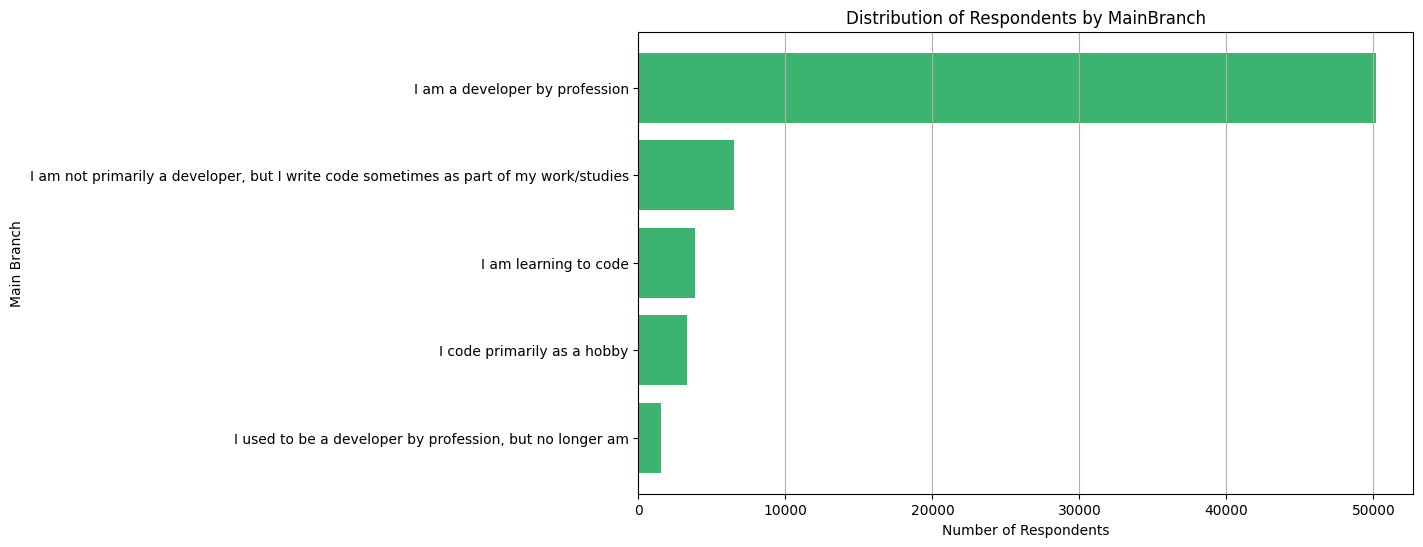

In [10]:
## Write your code here
# df['MainBranch'].unique()

# Query MainBranch and count occurrences
query = """
SELECT MainBranch, COUNT(*) as count
FROM survey
WHERE MainBranch IS NOT NULL
GROUP BY MainBranch
ORDER BY count DESC
"""
mainbranch_counts = pd.read_sql_query(query, conn)

# Horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(mainbranch_counts['MainBranch'], mainbranch_counts['count'], color='mediumseagreen')
plt.title('Distribution of Respondents by MainBranch')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.gca().invert_yaxis()  # To have the largest bar on top
plt.grid(axis='x')
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



/tmp/ipykernel_1255/920819175.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(sep)


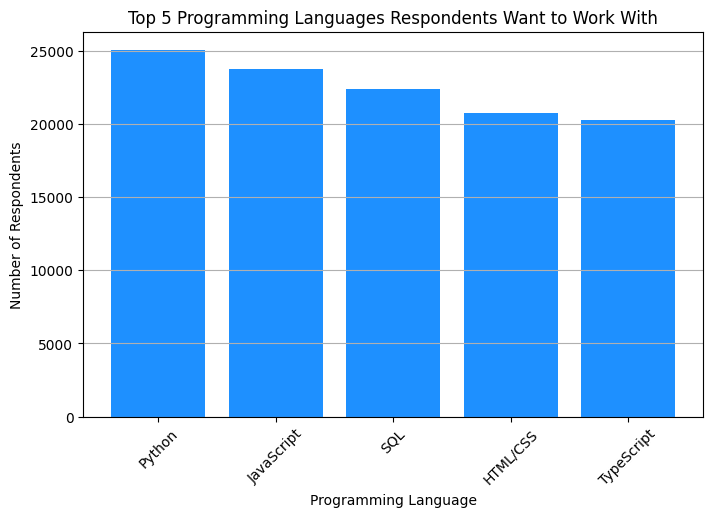

In [13]:
## Write your code here
# df['LanguageWantToWorkWith'].unique()

#Define your split_and_explode function
def split_and_explode(df, column, sep=';'):
    """Split the values in a column by sep and explode into separate rows"""
    df = df.dropna(subset=[column])
    df[column] = df[column].str.split(sep)
    return df.explode(column)

# Apply split_and_explode to LanguageWantToWorkWith
languages_df = split_and_explode(df, 'LanguageWantToWorkWith')

# Connect to SQLite database and create table
conn = sqlite3.connect("survey.db")
languages_df.to_sql("languages", conn, index=False, if_exists="replace")

# Query top 5 most desired languages
query = """
SELECT LanguageWantToWorkWith AS Language, COUNT(*) AS count
FROM languages
GROUP BY Language
ORDER BY count DESC
LIMIT 5
"""
top_languages = pd.read_sql_query(query, conn)

# Vertical bar chart
plt.figure(figsize=(8,5))
plt.bar(top_languages['Language'], top_languages['count'], color='dodgerblue')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


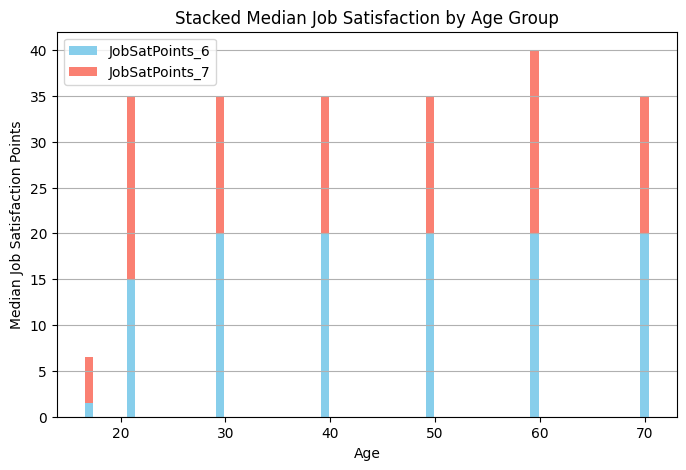

In [15]:
## Write your code here
# df['JobSatPoints_7'].unique()

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Query median JobSatPoints_6 and JobSatPoints_7 by AgeNumeric
query = """
SELECT AgeNumeric,
       MEDIAN(JobSatPoints_6) AS MedianJobSat6,
       MEDIAN(JobSatPoints_7) AS MedianJobSat7
FROM survey
WHERE AgeNumeric IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
AND JobSatPoints_7 IS NOT NULL
GROUP BY AgeNumeric
ORDER BY AgeNumeric
"""
# SQLite doesn't have a built-in MEDIAN function, so we calculate median in pandas after query
data = pd.read_sql_query("SELECT AgeNumeric, JobSatPoints_6, JobSatPoints_7 FROM survey WHERE AgeNumeric IS NOT NULL AND JobSatPoints_6 IS NOT NULL AND JobSatPoints_7 IS NOT NULL", conn)
median_data = data.groupby('AgeNumeric')[['JobSatPoints_6','JobSatPoints_7']].median().reset_index()

# Stacked bar chart
plt.figure(figsize=(8,5))
plt.bar(median_data['AgeNumeric'], median_data['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(median_data['AgeNumeric'], median_data['JobSatPoints_7'], bottom=median_data['JobSatPoints_6'], label='JobSatPoints_7', color='salmon')
plt.title('Stacked Median Job Satisfaction by Age Group')
plt.xlabel('Age')
plt.ylabel('Median Job Satisfaction Points')
plt.legend()
plt.grid(axis='y')
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



/tmp/ipykernel_1255/503874079.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.split(sep)


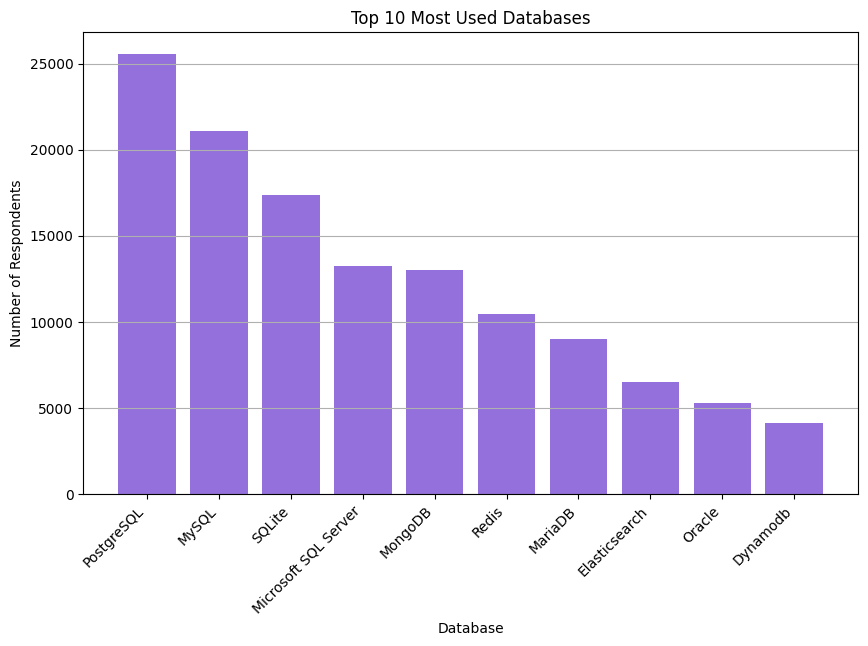

In [18]:
## Write your code here
# df['DatabaseHaveWorkedWith'].unique()

# Load CSV into pandas DataFrame
df = pd.read_csv("survey-data.csv")

# Define split_and_explode function
def split_and_explode(df, column, sep=';'):
    """Split the values in a column by sep and explode into separate rows"""
    df = df.dropna(subset=[column])
    df[column] = df[column].str.split(sep)
    return df.explode(column)

# Apply split_and_explode to DatabaseHaveWorkedWith
databases_df = split_and_explode(df, 'DatabaseHaveWorkedWith')

# Connect to SQLite database and create table
conn = sqlite3.connect("survey.db")
databases_df.to_sql("databases", conn, index=False, if_exists="replace")

# Query top 10 most used databases
query = """
SELECT DatabaseHaveWorkedWith AS Database, COUNT(*) AS count
FROM databases
GROUP BY Database
ORDER BY count DESC
LIMIT 10
"""
top_databases = pd.read_sql_query(query, conn)

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top_databases['Database'], top_databases['count'], color='mediumpurple')
plt.title('Top 10 Most Used Databases')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



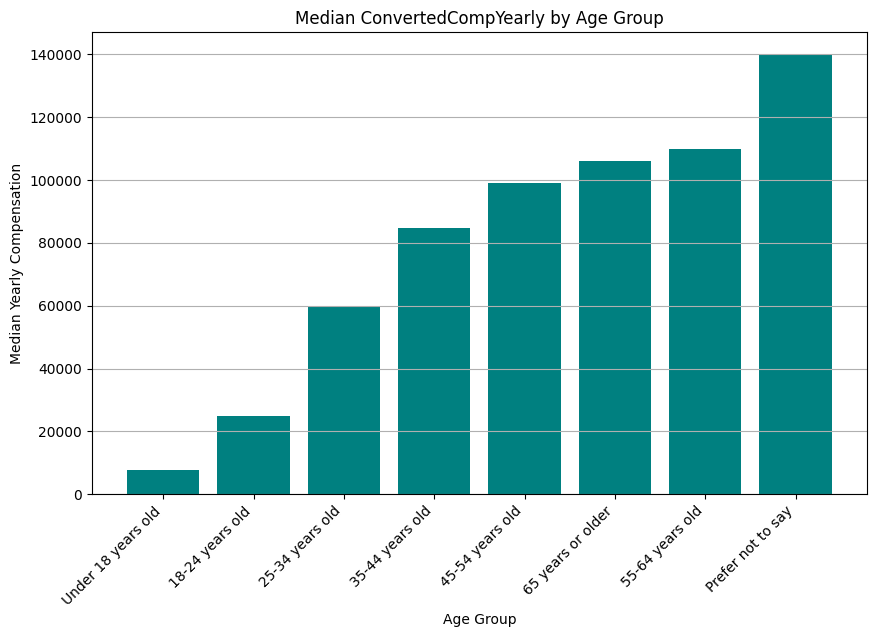

In [19]:
## Write your code here
# Load CSV into pandas DataFrame
df = pd.read_csv("survey-data.csv")

# Map Age to numeric values
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Connect to SQLite database and create table
conn = sqlite3.connect("survey.db")
df.to_sql("survey", conn, index=False, if_exists="replace")

# Query Age and ConvertedCompYearly (exclude NULLs)
query = """
SELECT Age, ConvertedCompYearly
FROM survey
WHERE Age IS NOT NULL AND ConvertedCompYearly IS NOT NULL
"""
data = pd.read_sql_query(query, conn)

# Calculate median ConvertedCompYearly per age group
median_data = data.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Optional: sort by median for nicer chart
median_data = median_data.sort_values('ConvertedCompYearly')

# Grouped bar chart
plt.figure(figsize=(10,6))
plt.bar(median_data['Age'], median_data['ConvertedCompYearly'], color='teal')
plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



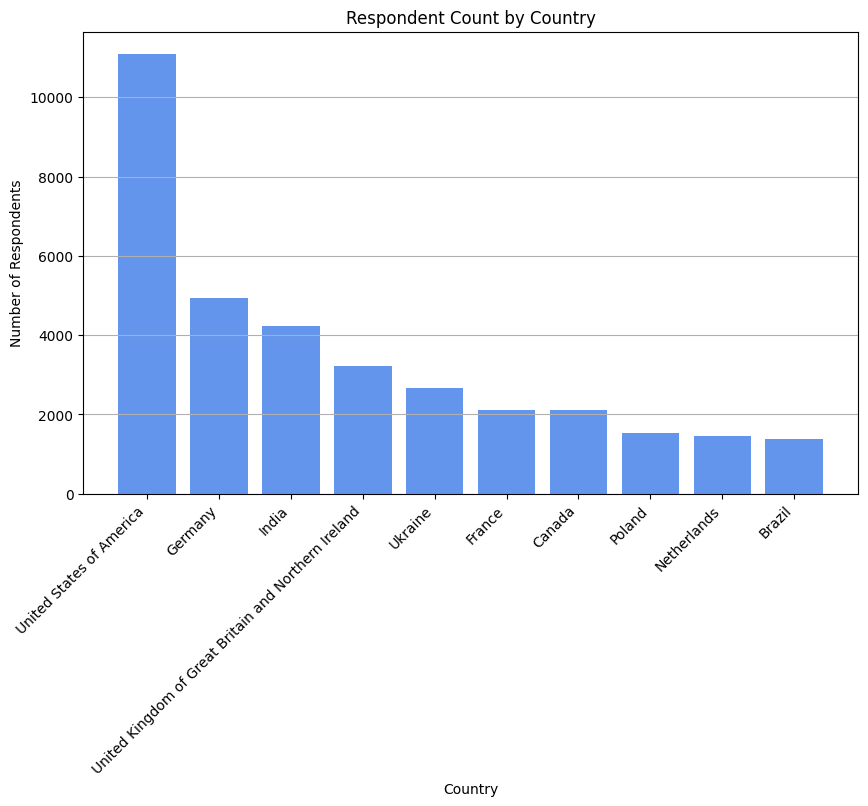

Connection closed by Diyor


In [20]:
## Write your code here
# Load CSV into pandas DataFrame
df = pd.read_csv("survey-data.csv")

# Connect to SQLite database and create table
conn = sqlite3.connect("survey.db")
df.to_sql("survey", conn, index=False, if_exists="replace")

# Query respondent count per country
query = """
SELECT Country, COUNT(*) AS count
FROM survey
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY count DESC
"""
country_counts = pd.read_sql_query(query, conn)

# Optional: display only top 10 countries for readability
top_countries = country_counts.head(10)

# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top_countries['Country'], top_countries['count'], color='cornflowerblue')
plt.title('Respondent Count by Country')
plt.xlabel('Country')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Close connection
conn.close()

name = 'Diyor'
print(f'Connection closed by {name}')

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
